In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
## IC
L = 1.0
sigma = 0.1
c = 1.0
t_final = 3

## next stuff:

nx = 100
dx = L / (nx - 1)
r = 0.5 ## c * deltax/delta t or something like that 
## r chosen this way so as not to have somethign somethign about too many dx passed in 1 dt i think
dt = r * dx / c
nt = int(t_final / dt) + 1  # however many steps this gives you
nt

595

In [65]:

t = np.linspace(0, t_final, nt)

##

## arrays and such:
x = np.linspace(0, L, nx)
t = np.linspace(0, t_final, nt)

u = np.zeros((nt, nx)) 

print(u[:,0])##  time array
print(u[0,:]) ## initial position array

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [66]:
u[0,:] = np.exp(-(x-L/2)**2/(2*sigma**2))

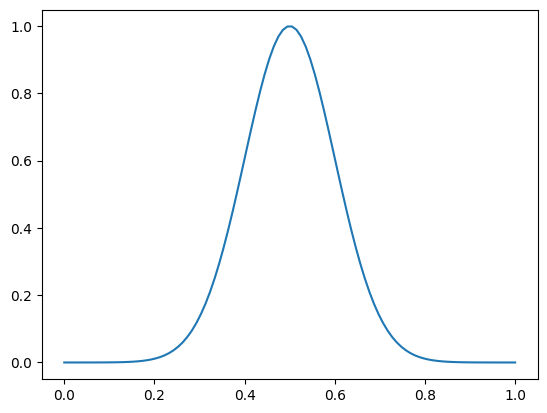

In [67]:
u[0,:]

plt.plot(x, u[0,:])

### looks good now diddy time (AKA first time step, j=1)

need to compute $u[1, :]$ hell yeah diddy. This is a bit tricky e cant use the reular leap frog, so we do a taylor exponation around t=0 to get

$$u_i^1 = u_i^0 + v^0_i \Delta t + \frac{r^2}{2}(u^0_{i+1} - 2u^0_i + u^0_{i-1})$$

where $r = \frac{c \Delta t}{\Delta x}$

and if $v_i^0 = 0$ then we can say:


$$u_i^1 = u_i^0 + \frac{r^2}{2}(u^0_{i+1} - 2u^0_i + u^0_{i-1})$$

In [68]:
for i in range(1, nx-1):

    u[1,i] = u[0,i] + (r**2)/2 * (u[0,i+1] - 2*u[0,i] + u[0,i-1])

# Boundary conditions - fixed ends
u[1, 0] = 0      # left boundary
u[1, -1] = 0     # right boundary (nx-1)


## now i will write the diddy frickin leapfrog

$$u_i^{j+1} = 2u_i^j - u_i^{j-1} + r^2 (u^j_{i+1} - 2u_i^j + u^j_{i-1})$$

In [71]:
for j in range(1, nt-1):
    for i in range(1, nx-1):
        u[j+1, i] = 2*u[j, i] - u[j-1,i] + (r**2)*(u[j,i+1] - 2*u[j,i] + u[j, i-1]) ## j is time, i is space
    
    ## boundary conditions:
    u[j+1, 0] = 0
    u[j+1, -1] = 0

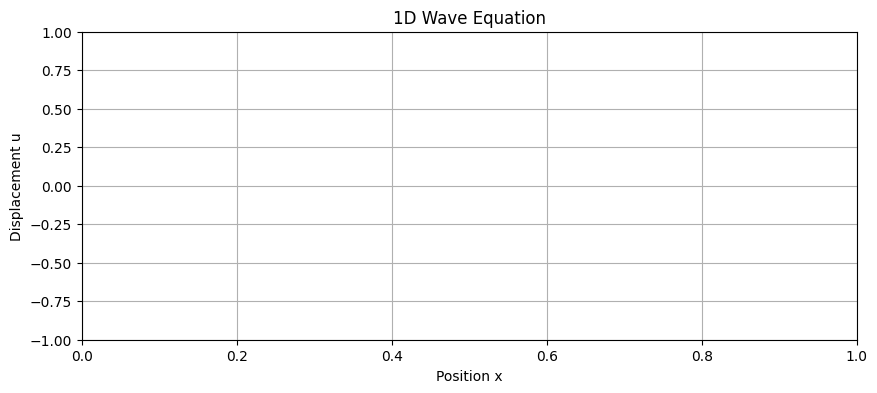

In [72]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots(figsize=(10, 4))
line, = ax.plot([], [], 'b-', lw=2)

ax.set_xlim(0, L)
ax.set_ylim(-1, 1)  # adjust based on your wave amplitude
ax.set_xlabel('Position x')
ax.set_ylabel('Displacement u')
ax.set_title('1D Wave Equation')
ax.grid(True)

def init():
    line.set_data([], [])
    return line,

def animate(frame):
    line.set_data(x, u[frame, :])
    ax.set_title(f'1D Wave Equation - Time step {frame}/{nt-1}')
    return line,

# Create animation - show every Nth frame for speed
skip = max(1, nt // 200)  # show ~200 frames total
frames = range(0, nt, skip)

anim = FuncAnimation(fig, animate, init_func=init, 
                    frames=frames, interval=20, blit=True)

plt.show()

In [73]:
u

array([[ 3.72665317e-06,  6.14389891e-06,  1.00262383e-05, ...,
         1.00262383e-05,  6.14389891e-06,  3.72665317e-06],
       [ 0.00000000e+00,  6.32703562e-06,  1.03121339e-05, ...,
         1.03121339e-05,  6.32703562e-06,  0.00000000e+00],
       [ 0.00000000e+00,  5.92468799e-06,  1.11829929e-05, ...,
         1.11829929e-05,  5.92468799e-06,  0.00000000e+00],
       ...,
       [ 0.00000000e+00, -3.50799099e-06, -8.48065510e-06, ...,
        -8.48065510e-06, -3.50799099e-06,  0.00000000e+00],
       [ 0.00000000e+00, -3.94956636e-06, -9.30020759e-06, ...,
        -9.30020759e-06, -3.94956636e-06,  0.00000000e+00],
       [ 0.00000000e+00, -4.74141044e-06, -1.05420966e-05, ...,
        -1.05420966e-05, -4.74141044e-06,  0.00000000e+00]])

In [74]:
print("Initial condition max:", u[0, :].max())
print("Initial condition at center:", u[0, nx//2])

Initial condition max: 0.9987254328882499
Initial condition at center: 0.9987254328882499


[3.72665317e-06 6.14389891e-06 1.00262383e-05 1.61957424e-05
 2.58959932e-05 4.09857759e-05 6.42099934e-05 9.95728564e-05
 1.52843925e-04 2.32233182e-04 3.49276399e-04 5.19975743e-04
 7.66241736e-04 1.11767979e-03 1.61375600e-03 2.30636063e-03
 3.26276232e-03 4.56890930e-03 6.33298575e-03 8.68907130e-03
 1.18006814e-02 1.58638899e-02 2.11096565e-02 2.78049116e-02
 3.62518979e-02 4.67852390e-02 5.97662260e-02 7.55738747e-02
 9.45924385e-02 1.17195255e-01 1.43725065e-01 1.74471250e-01
 2.09644807e-01 2.49352209e-01 2.93569685e-01 3.42119690e-01
 3.94651546e-01 4.50628259e-01 5.09321387e-01 5.69815527e-01
 6.31023482e-01 6.91712523e-01 7.50541364e-01 8.06106646e-01
 8.56996891e-01 9.01851159e-01 9.39419053e-01 9.68618450e-01
 9.88587205e-01 9.98725433e-01 9.98725433e-01 9.88587205e-01
 9.68618450e-01 9.39419053e-01 9.01851159e-01 8.56996891e-01
 8.06106646e-01 7.50541364e-01 6.91712523e-01 6.31023482e-01
 5.69815527e-01 5.09321387e-01 4.50628259e-01 3.94651546e-01
 3.42119690e-01 2.935696

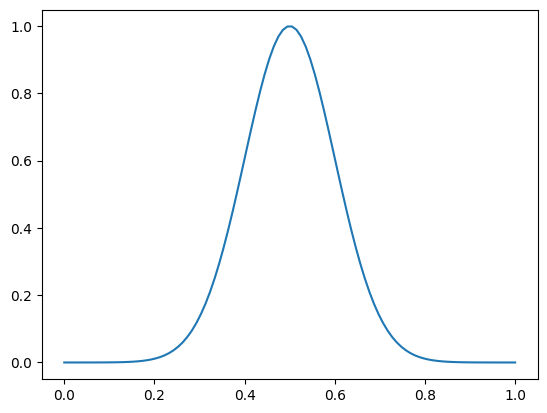

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## IC
L = 1.0
sigma = 0.1
c = 1.0
t_final = 3

## next stuff:

nx = 100
dx = L / (nx - 1)
r = 0.5 ## c * deltax/delta t or something like that 
## r chosen this way so as not to have somethign somethign about too many dx passed in 1 dt i think
dt = r * dx / c
nt = int(t_final / dt) + 1  # however many steps this gives you



t = np.linspace(0, t_final, nt)

##

## arrays and such:
x = np.linspace(0, L, nx)
t = np.linspace(0, t_final, nt)

u = np.zeros((nt, nx)) 

u[0,:] = np.exp(-(x-L/2)**2/(2*sigma**2))

for i in range(1, nx-1):

    u[1,i] = u[0,i] + (r**2)/2 * (u[0,i+1] - 2*u[0,i] + u[0,i-1])

# Boundary conditions - fixed ends
u[1, 0] = 0      # left boundary
u[1, -1] = 0     # right boundary (nx-1)

print(u[0,:])

plt.plot(x, u[0,:])
print("Initial condition max:", u[0, :].max())
print("Initial condition at center:", u[0, nx//2])


After time stepping:
u min: -0.9986496996854439
u max: 0.9987254328882499
u at final time: [ 0.00000000e+00 -4.74141044e-06 -1.05420966e-05 -1.85448365e-05
 -2.96592810e-05 -4.65952946e-05 -7.17950126e-05 -1.08985274e-04
 -1.64326982e-04 -2.45541148e-04 -3.64396408e-04 -5.36432845e-04
 -7.83305646e-04 -1.13466086e-03 -1.62912804e-03 -2.31832035e-03
 -3.26831515e-03 -4.56506442e-03 -6.31645465e-03 -8.65552021e-03
 -1.17471383e-02 -1.57884491e-02 -2.10110378e-02 -2.76835454e-02
 -3.61108560e-02 -4.66301111e-02 -5.96049275e-02 -7.54176417e-02
 -9.44555919e-02 -1.17093624e-01 -1.43674733e-01 -1.74487106e-01
 -2.09738861e-01 -2.49532655e-01 -2.93838633e-01 -3.42470968e-01
 -3.95072040e-01 -4.51096158e-01 -5.09807204e-01 -5.70285112e-01
 -6.31440081e-01 -6.92040228e-01 -7.50748332e-01 -8.06167556e-01
 -8.56896866e-01 -9.01589113e-01 -9.39006511e-01 -9.68079702e-01
 -9.87957136e-01 -9.98047024e-01 -9.98047024e-01 -9.87957136e-01
 -9.68079702e-01 -9.39006511e-01 -9.01589113e-01 -8.56896866e-01

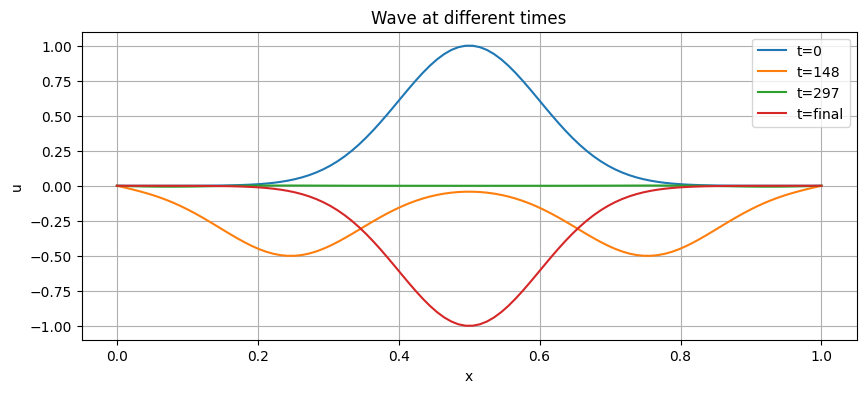

In [2]:

for i in range(1, nx-1):

    u[1,i] = u[0,i] + (r**2)/2 * (u[0,i+1] - 2*u[0,i] + u[0,i-1])

# Boundary conditions - fixed ends
u[1, 0] = 0      # left boundary
u[1, -1] = 0     # right boundary (nx-1)


for j in range(1, nt-1):
    for i in range(1, nx-1):
        u[j+1, i] = 2*u[j, i] - u[j-1,i] + (r**2)*(u[j,i+1] - 2*u[j,i] + u[j, i-1]) ## j is time, i is space
    
    ## boundary conditions:
    u[j+1, 0] = 0
    u[j+1, -1] = 0



print("After time stepping:")
print("u min:", u.min())
print("u max:", u.max())
print("u at final time:", u[-1, :])
print("u at middle time:", u[nt//2, :])

# Plot a few time snapshots
plt.figure(figsize=(10, 4))
plt.plot(x, u[0, :], label='t=0')
plt.plot(x, u[nt//4, :], label=f't={nt//4}')
plt.plot(x, u[nt//2, :], label=f't={nt//2}')
plt.plot(x, u[-1, :], label='t=final')
plt.xlabel('x')
plt.ylabel('u')
plt.legend()
plt.grid(True)
plt.title('Wave at different times')
plt.show()

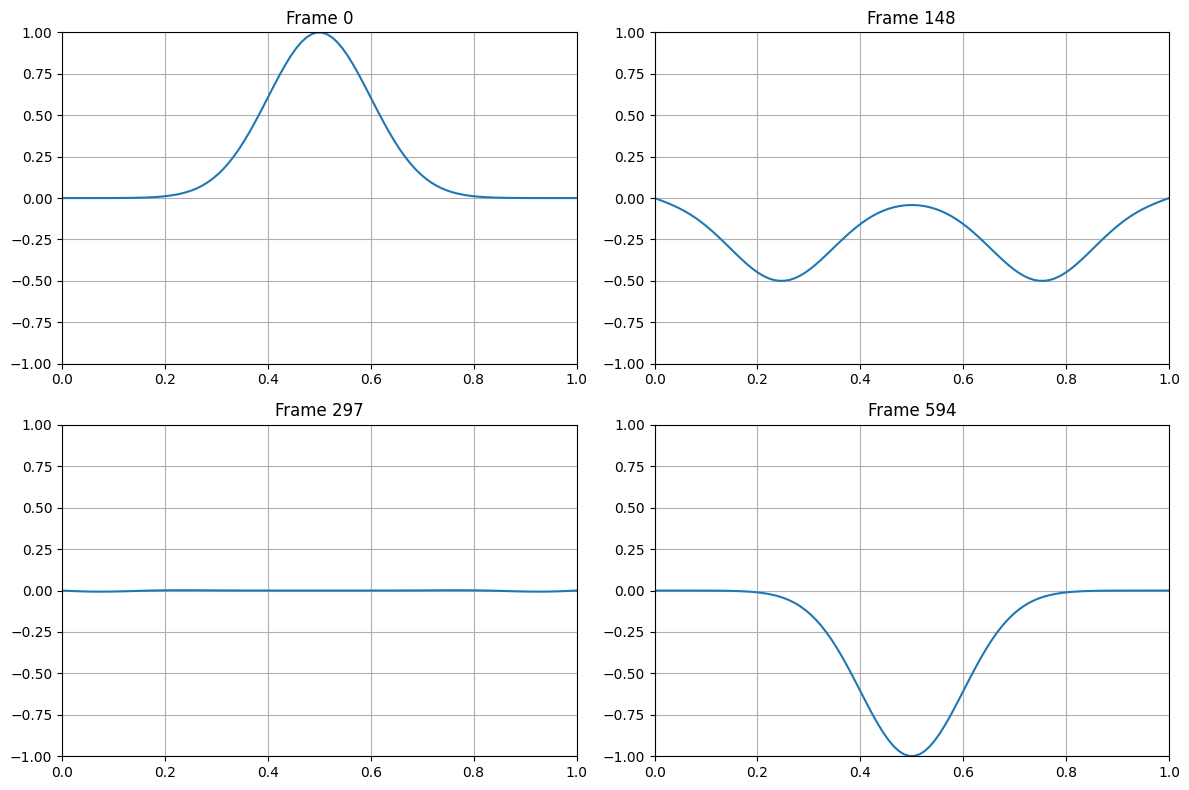

In [3]:
# Simple test - manually plot a few frames
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

frames_to_plot = [0, nt//4, nt//2, nt-1]
for idx, frame in enumerate(frames_to_plot):
    axes[idx].plot(x, u[frame, :])
    axes[idx].set_xlim(0, L)
    axes[idx].set_ylim(-1, 1)
    axes[idx].set_title(f'Frame {frame}')
    axes[idx].grid(True)

plt.tight_layout()
plt.show()

In [5]:
from matplotlib.animation import FuncAnimation, PillowWriter

fig, ax = plt.subplots(figsize=(8, 3))
line, = ax.plot(x, u[0, :], 'b-', lw=2)

ax.set_xlim(0, L)
ax.set_ylim(-1.2, 1.2)
ax.set_xlabel('Position x')
ax.set_ylabel('Displacement u')
ax.grid(True)

def animate(frame):
    line.set_ydata(u[frame, :])
    ax.set_title(f't = {t[frame]:.2f}s')
    return line,

# Only use 50 frames total (much less!)
skip = max(1, nt // 100)
anim = FuncAnimation(fig, animate, frames=range(0, nt, skip), 
                     interval=100, blit=True)

# Save with lower quality
anim.save('wave_1d.gif', writer=PillowWriter(fps=10), dpi=80)
print("Saved!")

plt.close()

Saved!


## bc : rebound

[3.72665317e-06 6.14389891e-06 1.00262383e-05 1.61957424e-05
 2.58959932e-05 4.09857759e-05 6.42099934e-05 9.95728564e-05
 1.52843925e-04 2.32233182e-04 3.49276399e-04 5.19975743e-04
 7.66241736e-04 1.11767979e-03 1.61375600e-03 2.30636063e-03
 3.26276232e-03 4.56890930e-03 6.33298575e-03 8.68907130e-03
 1.18006814e-02 1.58638899e-02 2.11096565e-02 2.78049116e-02
 3.62518979e-02 4.67852390e-02 5.97662260e-02 7.55738747e-02
 9.45924385e-02 1.17195255e-01 1.43725065e-01 1.74471250e-01
 2.09644807e-01 2.49352209e-01 2.93569685e-01 3.42119690e-01
 3.94651546e-01 4.50628259e-01 5.09321387e-01 5.69815527e-01
 6.31023482e-01 6.91712523e-01 7.50541364e-01 8.06106646e-01
 8.56996891e-01 9.01851159e-01 9.39419053e-01 9.68618450e-01
 9.88587205e-01 9.98725433e-01 9.98725433e-01 9.88587205e-01
 9.68618450e-01 9.39419053e-01 9.01851159e-01 8.56996891e-01
 8.06106646e-01 7.50541364e-01 6.91712523e-01 6.31023482e-01
 5.69815527e-01 5.09321387e-01 4.50628259e-01 3.94651546e-01
 3.42119690e-01 2.935696

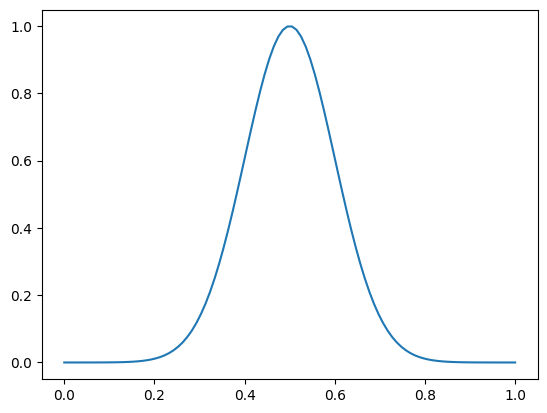

In [7]:
import numpy as np
import matplotlib.pyplot as plt

## IC
L = 1.0
sigma = 0.1
c = 1.0
t_final = 3

## next stuff:

nx = 100
dx = L / (nx - 1)
r = 0.5 ## c * deltax/delta t or something like that 
## r chosen this way so as not to have somethign somethign about too many dx passed in 1 dt i think
dt = r * dx / c
nt = int(t_final / dt) + 1  # however many steps this gives you



t = np.linspace(0, t_final, nt)

##

## arrays and such:
x = np.linspace(0, L, nx)
t = np.linspace(0, t_final, nt)

u = np.zeros((nt, nx)) 

u[0,:] = np.exp(-(x-L/2)**2/(2*sigma**2))

for i in range(1, nx-1):

    u[1,i] = u[0,i] + (r**2)/2 * (u[0,i+1] - 2*u[0,i] + u[0,i-1])

# Boundary conditions - rebound
u[1, 0] = u[1,1]      # left reflects
u[1, -1] = u[1,-2]     # right boundary reflects

print(u[0,:])

plt.plot(x, u[0,:])
print("Initial condition max:", u[0, :].max())
print("Initial condition at center:", u[0, nx//2])


After time stepping:
u min: -1.2346243631800122e-05
u max: 0.9987254328882499
u at final time: [1.57548683e-05 1.57548683e-05 2.29727941e-05 3.88910722e-05
 6.56370842e-05 1.05696748e-04 1.64951036e-04 2.50502286e-04
 3.71134609e-04 5.40490903e-04 7.76370598e-04 1.10198157e-03
 1.54748732e-03 2.15280211e-03 2.96837369e-03 4.05663558e-03
 5.49647185e-03 7.38456794e-03 9.83803538e-03 1.29979491e-02
 1.70310293e-02 2.21319019e-02 2.85236046e-02 3.64565082e-02
 4.62070827e-02 5.80751059e-02 7.23757747e-02 8.94319976e-02
 1.09563195e-01 1.33070610e-01 1.60218937e-01 1.91217779e-01
 2.26202851e-01 2.65212665e-01 3.08168780e-01 3.54857298e-01
 4.04913262e-01 4.57813317e-01 5.12872137e-01 5.69247316e-01
 6.25955797e-01 6.81896020e-01 7.35879136e-01 7.86670884e-01
 8.33036947e-01 8.73792480e-01 9.07853482e-01 9.34282638e-01
 9.52334801e-01 9.61493320e-01 9.61493320e-01 9.52334801e-01
 9.34282638e-01 9.07853482e-01 8.73792480e-01 8.33036947e-01
 7.86670884e-01 7.35879136e-01 6.81896020e-01 6.259

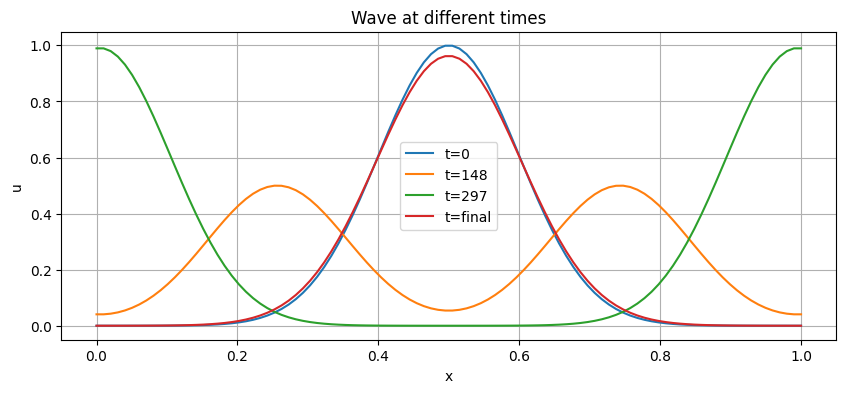

In [8]:

for i in range(1, nx-1):

    u[1,i] = u[0,i] + (r**2)/2 * (u[0,i+1] - 2*u[0,i] + u[0,i-1])

# Boundary conditions - fixed ends
u[1, 0] = 0      # left boundary
u[1, -1] = 0     # right boundary (nx-1)


for j in range(1, nt-1):
    for i in range(1, nx-1):
        u[j+1, i] = 2*u[j, i] - u[j-1,i] + (r**2)*(u[j,i+1] - 2*u[j,i] + u[j, i-1]) ## j is time, i is space
    
    ## boundary conditions:
    u[j+1, 0] = u[j+1, 1]
    u[j+1, -1] = u[j+1, -2]



print("After time stepping:")
print("u min:", u.min())
print("u max:", u.max())
print("u at final time:", u[-1, :])
print("u at middle time:", u[nt//2, :])

# Plot a few time snapshots
plt.figure(figsize=(10, 4))
plt.plot(x, u[0, :], label='t=0')
plt.plot(x, u[nt//4, :], label=f't={nt//4}')
plt.plot(x, u[nt//2, :], label=f't={nt//2}')
plt.plot(x, u[-1, :], label='t=final')
plt.xlabel('x')
plt.ylabel('u')
plt.legend()
plt.grid(True)
plt.title('Wave at different times')
plt.show()

In [9]:
from matplotlib.animation import FuncAnimation, PillowWriter

fig, ax = plt.subplots(figsize=(8, 3))
line, = ax.plot(x, u[0, :], 'b-', lw=2)

ax.set_xlim(0, L)
ax.set_ylim(-1.2, 1.2)
ax.set_xlabel('Position x')
ax.set_ylabel('Displacement u')
ax.grid(True)

def animate(frame):
    line.set_ydata(u[frame, :])
    ax.set_title(f't = {t[frame]:.2f}s')
    return line,

# Only use 50 frames total (much less!)
skip = max(1, nt // 100)
anim = FuncAnimation(fig, animate, frames=range(0, nt, skip), 
                     interval=100, blit=True)

# Save with lower quality
anim.save('wave_1d_reflect.gif', writer=PillowWriter(fps=10), dpi=80)
print("Saved!")

plt.close()

Saved!


## 2D - 2 Diddy

In [23]:
import numpy as np
import matplotlib.pyplot as plt

## IC
L = 1.0
sigma = 0.1
c = 1.0
t_final = 1

## next stuff:

nx = 100
ny = 100
dx = L / (nx - 1)
dy = L / (ny - 1)

r = 0.5 ## c * deltax/delta t or something like that 
## r chosen this way so as not to have somethign somethign about too many dx passed in 1 dt i think
rx = r
ry = r

dt = r*dx/c
nt = int(t_final / dt)  + 1



t = np.linspace(0, t_final, nt)



##

## arrays and such:
x = np.linspace(0, L, nx)
y = np.linspace(0, L, ny)
t = np.linspace(0, t_final, nt)

X, Y = np.meshgrid(x, y, indexing='ij')

u = np.zeros((nt, nx, ny)) 

u[0, :, :] = np.exp(-((X - L/2)**2 + (Y - L/2)**2) / (2*sigma**2))

u[0,0,:] = 0
u[0,:,0] = 0

u[0,-1,:] = 0
u[0,:,-1] = 0


## 2D first iteration:

$$u^1_{i,k} = u^0_{i,k} + \frac{r^2_x}{2}(u^0_{i+1, k} - 2u^0_{i,k} + u^0_{i-1, k}) + \frac{r^2_y}{2}(u^0_{i, k+1} - 2u^0_{i,k} + u^0_{i, k-1}) $$

In [24]:
for i in range(1, nx-1):
    for k in range(1, ny-1):
        u[1, i, k] = u[0, i, k] + (rx**2)/2 * (u[0, i+1, k] - 2*u[0, i, k] + u[0, i-1, k]) + (ry**2)/2 * (u[0, i, k+1] - 2*u[0, i, k] + u[0, i, k-1])
# Boundary conditions - rebound

u[1,0,:] = 0
u[1,:,0] = 0

u[1,-1,:] = 0
u[1,:,-1] = 0

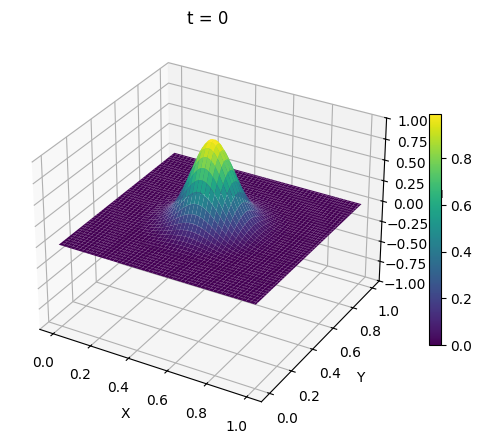

In [25]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(14, 6))

# Initial condition (t=0)
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
surf1 = ax1.plot_surface(X, Y, u[0, :, :], cmap='viridis')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('u')
ax1.set_title('t = 0')
ax1.set_zlim(-1, 1)  # fix z-axis for comparison
fig.colorbar(surf1, ax=ax1, shrink=0.5)


## 2D leaprfrong
diddy edition

$$u^{j+1}_{i,k} = 2u^j_{i,k} - u^{j-1}_{i,k} + r_x^2 (u^j_{i+1, k} - 2u^j_{i,k} + u^j_{i-1, k}) + r_y^2 (u^i_{i,k+1} - 2u^j_{i,k} + u^j_{i, k-1}) $$

In [26]:
for j in range(1, nt-1):
    print(j)
    for i in range(1, nx-1):
        for k in range(1, ny-1):
            u[j+1,i,k] = 2*u[j,i,k] - u[j-1,i,k] + (rx**2)*(u[j,i+1,k] - 2*u[j,i,k] + u[j,i-1,k]) + (ry**2)*(u[j,i,k+1] - 2*u[j,i,k] + u[j,i,k-1])

    
    u[j+1,0,:] = 0
    u[j+1,:,0] = 0

    u[j+1,-1,:] = 0
    u[j+1,:,-1] = 0

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196


In [27]:
from matplotlib.animation import FuncAnimation, PillowWriter

fig, ax = plt.subplots(figsize=(6, 5))

# Initial frame
im = ax.imshow(u[0, :, :].T, extent=[0, L, 0, L], origin='lower', 
               cmap='RdBu_r', vmin=-1, vmax=1, animated=True)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('2D Wave Equation - t = 0.00s')
fig.colorbar(im, ax=ax, label='Displacement u')

def animate(frame):
    im.set_array(u[frame, :, :].T)
    ax.set_title(f'2D Wave - t = {t[frame]:.2f}s')
    return [im]

# Only 30 frames, slow fps
skip = max(1, nt // 30)
anim = FuncAnimation(fig, animate, frames=range(0, nt, skip), 
                     interval=200, blit=True)

anim.save('wave_2d.gif', writer=PillowWriter(fps=5), dpi=60)
print("Saved wave_2d.gif!")

plt.close()

Saved wave_2d.gif!


In [28]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation, PillowWriter

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Initial surface
surf = ax.plot_surface(X, Y, u[0, :, :], cmap='viridis', 
                       vmin=-1, vmax=1, edgecolor='none')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('u')
ax.set_zlim(-1, 1)
ax.set_title('2D Wave - t = 0.00s')

def animate(frame):
    ax.clear()
    surf = ax.plot_surface(X, Y, u[frame, :, :], cmap='viridis',
                          vmin=-1, vmax=1, edgecolor='none')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('u')
    ax.set_zlim(-1, 1)
    ax.set_title(f'2D Wave - t = {t[frame]:.2f}s')
    return [surf]

# Keep it small - 30 frames
skip = max(1, nt // 30)
anim = FuncAnimation(fig, animate, frames=range(0, nt, skip), 
                     interval=200, blit=False)

anim.save('wave_2d_3d.gif', writer=PillowWriter(fps=5), dpi=60)
print("Saved wave_2d_3d.gif!")

plt.close()

Saved wave_2d_3d.gif!
